#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load your dataset
df = pd.read_csv('/content/Salaries.csv')


## **Basic Data Exploration**

In [3]:
# Number of rows and columns
rows, columns = df.shape

# Data types of each column
data_types = df.dtypes

# Check for missing values
missing_values = df.isnull().sum()

# Print the results
print("Number of rows:", rows)
print("Number of columns:", columns)
print("\nData Types:\n", data_types)
print("\nMissing values in each column:\n", missing_values)

Number of rows: 148654
Number of columns: 13

Data Types:
 Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

Missing values in each column:
 Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


# **Descriptive Statistics**

In [51]:
# Basic statistics with describe()
basic_stats = df['BasePay'].describe()

# Calculating median and mode separately
median_BasePay = df['BasePay'].median()
mode_BasePay = df['BasePay'].mode()[0]  # Taking the first mode

# Calculating range
range_BasePay = basic_stats['max'] - basic_stats['min']

# Printing the results
print(basic_stats)
print("\nMedian BasePay:", median_BasePay)
print("Mode BasePay:", mode_BasePay)
print("Range of Salaries:", range_BasePay)


count    148045.000000
mean      66325.448840
std       42764.635495
min        -166.010000
25%       33588.200000
50%       65007.450000
75%       94691.050000
max      319275.010000
Name: BasePay, dtype: float64

Median BasePay: 65007.45
Mode BasePay: 0.0
Range of Salaries: 319441.02


# **Data Cleaning**

In [4]:
# Imputing missing values in 'Benefits' with its median
median_benefits = df['Benefits'].median()
df['Benefits'].fillna(median_benefits, inplace=True)

# Confirming that there are no more missing values
missing_values_after_imputation = df.isnull().sum()
missing_values_after_imputation


Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

# **Basic Data Visualization**

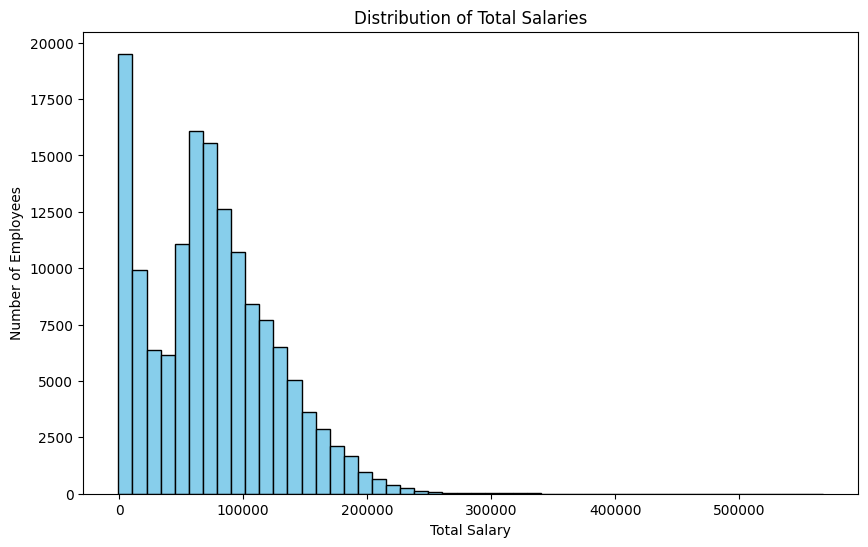

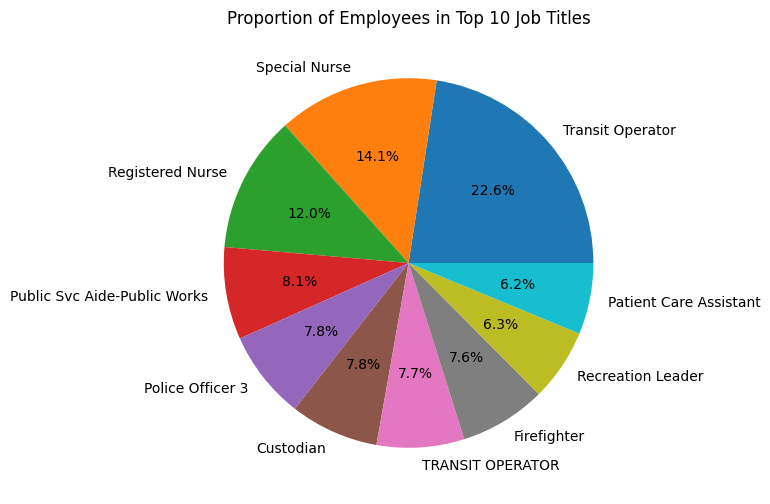

In [56]:
# Visualizing the distribution of TotalPay
plt.figure(figsize=(10, 6))
plt.hist(df['TotalPay'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Salaries')
plt.xlabel('Total Salary')
plt.ylabel('Number of Employees')
plt.show()

# Visualizing the proportion of employees in different departments (Job Titles)
# Due to the large number of unique job titles, we'll display the top 10 for clarity
top_departments = df['JobTitle'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_departments.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Employees in Top 10 Job Titles')
plt.ylabel('')  # Hide the y-label
plt.show()


# **Grouped Analysis**

In [5]:
# Grouping the data by 'JobTitle' and calculating summary statistics for each group
grouped_data = df.groupby('JobTitle')['TotalPay'].describe()

# Sorting the grouped data by mean salary to compare average salaries across different job titles
sorted_grouped_data = grouped_data.sort_values(by='mean', ascending=False)

# Displaying the top 10 job titles with highest average salaries
sorted_grouped_data.head(10)


,count,mean,std,min,25%,50%,75%,max
JobTitle,,,,,,,,
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,2.0,399211.275000,238131.155690,230827.12,315019.1975,399211.275,483403.3525,567595.43
Chief Investment Officer,1.0,339653.700000,NaN,339653.70,339653.7000,339653.700,339653.7000,339653.70
Chief of Police,3.0,329183.646667,9118.772821,321552.11,324134.4350,326716.760,332999.4150,339282.07
"Chief, Fire Department",3.0,325971.683333,11083.523432,314759.60,320496.5200,326233.440,331577.7250,336922.01
DEPUTY DIRECTOR OF INVESTMENTS,1.0,307899.460000,NaN,307899.46,307899.4600,307899.460,307899.4600,307899.46
"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",1.0,302377.730000,NaN,302377.73,302377.7300,302377.730,302377.7300,302377.73
"Gen Mgr, Public Trnsp Dept",3.0,297769.413333,6528.512299,294000.17,294000.1750,294000.180,299654.0350,305307.89
Asst Chf of Dept (Fire Dept),18.0,281763.483889,30838.234104,234795.82,258923.3400,280219.140,298006.3100,333888.32
"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",3.0,279359.560000,41086.598530,250339.35,255852.7450,261366.140,293869.6650,326373.19


# **Simple Correlation Analysis**

In [ ]:
# Clone the entire repo.
!git clone -l -s git://github.com/jakevdp/PythonDataScienceHandbook.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...


In [ ]:
# Fetch a single <1MB file using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://api.github.com/repos/jakevdp/PythonDataScienceHandbook/contents/notebooks/data/california_cities.csv

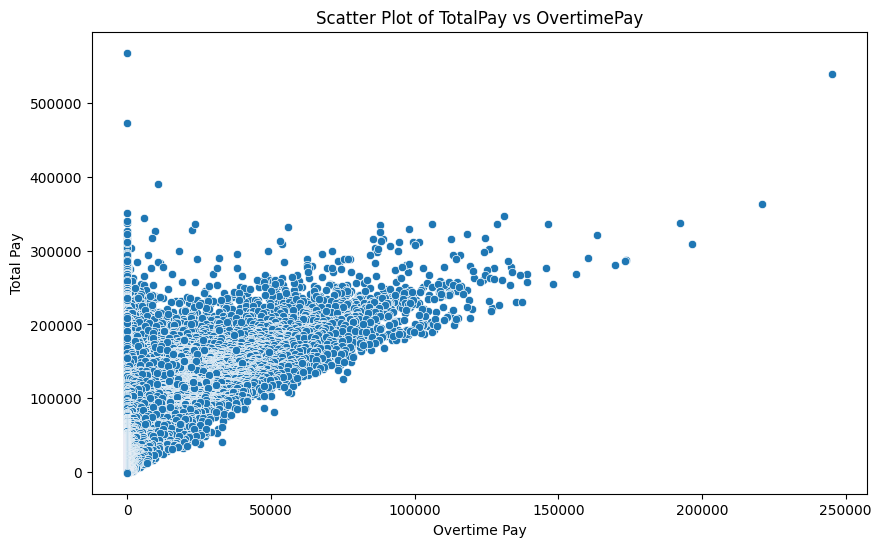

,TotalPay,OvertimePay
TotalPay,1.000000,0.504859
OvertimePay,0.504859,1.000000


In [59]:
# Selecting 'TotalPay' and 'OvertimePay' for correlation analysis
# These are two numerical columns where a correlation might be expected
selected_columns = ['TotalPay', 'OvertimePay']

# Calculating the correlation
correlation = df[selected_columns].corr()

# Scatter plot to visualize the relationship between TotalPay and OvertimePay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='OvertimePay', y='TotalPay', data=df)
plt.title('Scatter Plot of TotalPay vs OvertimePay')
plt.xlabel('Overtime Pay')
plt.ylabel('Total Pay')
plt.show()

correlation

# **Summary of Insights**

  Descriptive Statistics
**bold text**

* The dataset provided insights into various salary components such as base pay, overtime pay, other pay, and benefits.

* It was observed that certain job titles, particularly high-ranking positions like General Manager, Chief of Police, and Chief Investment Officer, have significantly higher salaries compared to other roles.



Missing Data Handling
**bold text**

* The dataset contained missing values in several columns. Notably, 'Benefits' had a significant proportion of missing data, especially for the year 2011.

* Methods like median imputation were used for columns with fewer missing values (BasePay, OvertimePay, OtherPay), considering their right-skewed distributions.

* Columns 'Notes' and 'Status', having all values missing, were dropped as they provided no informational value.



Salary Distribution Visualization
**bold text**

* Histograms revealed a right-skewed distribution of total salaries, indicating that higher salaries are less common.

* The pie chart for the top 10 job titles showed that positions like 'Transit Operator' and 'Special Nurse' were among the most common.


Grouped Data Analysis
**bold text**

* Grouping data by job title and calculating summary statistics revealed disparities in average salaries across different roles.

* Higher-ranking positions generally showed higher average salaries with some variance in pay within these roles.


Correlation Analysis
**bold text**

* A moderate positive correlation (approximately 0.505) was observed between Total Pay and Overtime Pay.

* The scatter plot displayed this relationship, indicating that while overtime pay contributes to total pay, it is not the sole determinant.



**Insights**

The distribution and range of salaries reflect a typical organizational structure where higher-ranking positions are fewer but command significantly higher pay.

The correlation between overtime pay and total pay suggests that overtime is a contributing factor to overall compensation but is complemented by other salary components.

The year-specific pattern in missing 'Benefits' data highlights the importance of understanding the context behind data collection methodologies.


> Indented block




# Good Luck!